In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tdf=pd.read_csv(r'C:\Users\My world\Downloads\train_MaefO4x\train.csv')

In [3]:
tdf

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
...,...,...,...,...
1092054,9517_132,9517,132,3.156
1092055,27767_118,27767,118,-1.594
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906


In [5]:
cat=tdf.select_dtypes(include="object").columns

In [6]:
cat

Index(['id'], dtype='object')

In [8]:
num=tdf.select_dtypes(exclude="object").columns

In [9]:
num

Index(['user_id', 'joke_id', 'Rating'], dtype='object')

In [10]:
tdf.isnull().sum()

id         0
user_id    0
joke_id    0
Rating     0
dtype: int64

In [11]:
tdf.shape

(1092059, 4)

In [13]:
tdf.describe()

,user_id,joke_id,Rating
count,1.092059e+06,1.092059e+06,1.092059e+06
mean,2.068356e+04,6.402266e+01,1.758394e+00
std,1.183032e+04,4.411652e+01,5.230860e+00
min,1.000000e+00,1.000000e+00,-1.000000e+01
25%,1.041200e+04,2.200000e+01,-1.719000e+00
50%,2.130800e+04,6.200000e+01,2.344000e+00
75%,3.078400e+04,1.040000e+02,5.781000e+00
max,4.086300e+04,1.390000e+02,1.000000e+01


In [14]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092059 entries, 0 to 1092058
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   id       1092059 non-null  object 
 1   user_id  1092059 non-null  int64  
 2   joke_id  1092059 non-null  int64  
 3   Rating   1092059 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.3+ MB


In [15]:
tdf.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [16]:
tdf.tail()

,id,user_id,joke_id,Rating
1092054,9517_132,9517,132,3.156
1092055,27767_118,27767,118,-1.594
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906
1092058,8420_98,8420,98,-3.344


In [17]:
tdf.count()

id         1092059
user_id    1092059
joke_id    1092059
Rating     1092059
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    tdf[i]=le.fit_transform(tdf[i])
tdf

,id,user_id,joke_id,Rating
0,635516,31030,110,2.750
1,166151,16144,109,5.094
2,382354,23098,6,-6.438
3,119501,14273,86,4.406
4,232328,18419,134,9.375
...,...,...,...,...
1092054,1078095,9517,132,3.156
1092055,531798,27767,118,-1.594
1092056,16477,10580,81,2.000
1092057,634543,31007,119,8.906


In [21]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
tdf['user_id_mm']=mm.fit_transform(tdf['user_id'].values.reshape(-1,1))

In [22]:
tdf

,id,user_id,joke_id,Rating,user_id_mm
0,635516,31030,110,2.750,0.759361
1,166151,16144,109,5.094,0.395061
2,382354,23098,6,-6.438,0.565244
3,119501,14273,86,4.406,0.349273
4,232328,18419,134,9.375,0.450737
...,...,...,...,...,...
1092054,1078095,9517,132,3.156,0.232881
1092055,531798,27767,118,-1.594,0.679507
1092056,16477,10580,81,2.000,0.258896
1092057,634543,31007,119,8.906,0.758798


In [23]:
min=tdf['user_id'].min()
max=tdf['user_id'].max()
nr=tdf['user_id']-min
dr=max-min
tdf['user_id_extra']=nr/dr

In [24]:
tdf

,id,user_id,joke_id,Rating,user_id_mm,user_id_extra
0,635516,31030,110,2.750,0.759361,0.759361
1,166151,16144,109,5.094,0.395061,0.395061
2,382354,23098,6,-6.438,0.565244,0.565244
3,119501,14273,86,4.406,0.349273,0.349273
4,232328,18419,134,9.375,0.450737,0.450737
...,...,...,...,...,...,...
1092054,1078095,9517,132,3.156,0.232881,0.232881
1092055,531798,27767,118,-1.594,0.679507,0.679507
1092056,16477,10580,81,2.000,0.258896,0.258896
1092057,634543,31007,119,8.906,0.758798,0.758798


In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
tdf['user_id_ss']=ss.fit_transform(tdf[['user_id']])
tdf

,id,user_id,joke_id,Rating,user_id_mm,user_id_extra,user_id_ss
0,635516,31030,110,2.750,0.759361,0.759361,0.874570
1,166151,16144,109,5.094,0.395061,0.395061,-0.383722
2,382354,23098,6,-6.438,0.565244,0.565244,0.204089
3,119501,14273,86,4.406,0.349273,0.349273,-0.541876
4,232328,18419,134,9.375,0.450737,0.450737,-0.191420
...,...,...,...,...,...,...,...
1092054,1078095,9517,132,3.156,0.232881,0.232881,-0.943894
1092055,531798,27767,118,-1.594,0.679507,0.679507,0.598754
1092056,16477,10580,81,2.000,0.258896,0.258896,-0.854040
1092057,634543,31007,119,8.906,0.758798,0.758798,0.872626


In [27]:
from sklearn.impute import KNNImputer
ki=KNNImputer()
tdf['id_impute']=ki.fit_transform(tdf['id'].values.reshape(-1,1))

In [28]:
tdf

,id,user_id,joke_id,Rating,user_id_mm,user_id_extra,user_id_ss,id_impute
0,635516,31030,110,2.750,0.759361,0.759361,0.874570,635516.0
1,166151,16144,109,5.094,0.395061,0.395061,-0.383722,166151.0
2,382354,23098,6,-6.438,0.565244,0.565244,0.204089,382354.0
3,119501,14273,86,4.406,0.349273,0.349273,-0.541876,119501.0
4,232328,18419,134,9.375,0.450737,0.450737,-0.191420,232328.0
...,...,...,...,...,...,...,...,...
1092054,1078095,9517,132,3.156,0.232881,0.232881,-0.943894,1078095.0
1092055,531798,27767,118,-1.594,0.679507,0.679507,0.598754,531798.0
1092056,16477,10580,81,2.000,0.258896,0.258896,-0.854040,16477.0
1092057,634543,31007,119,8.906,0.758798,0.758798,0.872626,634543.0


{'whiskers': [<matplotlib.lines.Line2D at 0x14c3e337640>,
 'caps': [<matplotlib.lines.Line2D at 0x14c3e337be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c3e337490>],
 'medians': [<matplotlib.lines.Line2D at 0x14c35f5e1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c35f5e490>],
 'means': []}

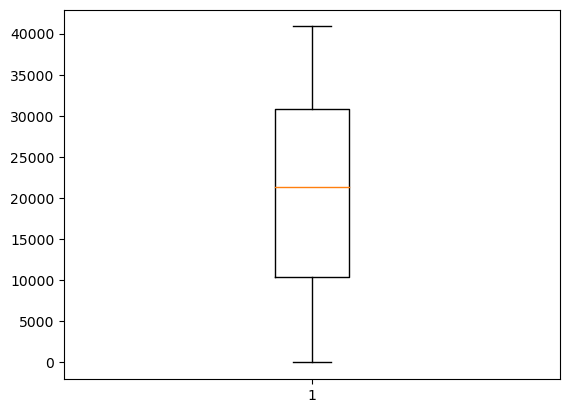

In [29]:
plt.boxplot(tdf['user_id'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c36c53a90>,
 'caps': [<matplotlib.lines.Line2D at 0x14c36c60070>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c36c537c0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c36c60610>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c36c608e0>],
 'means': []}

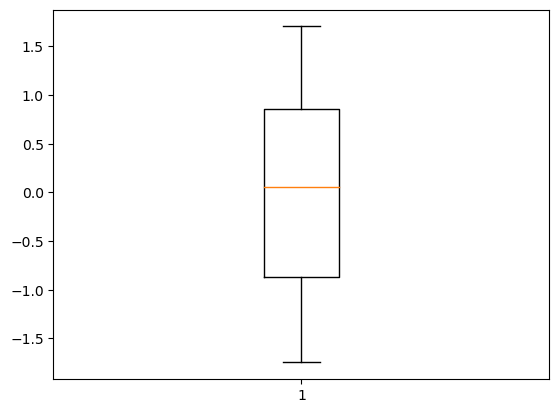

In [30]:
plt.boxplot(tdf['user_id_ss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c343eff40>,
 'caps': [<matplotlib.lines.Line2D at 0x14c33a26070>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c33f91ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c3397aa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c3397ac70>],
 'means': []}

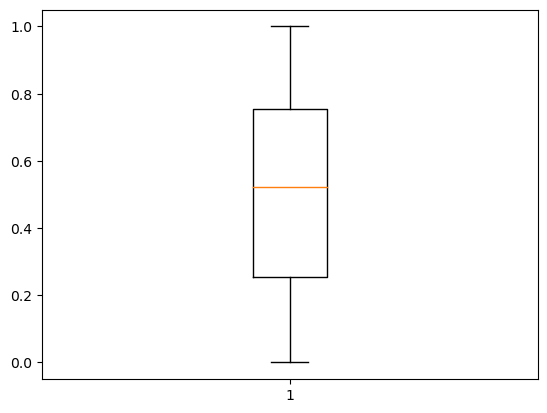

In [31]:
plt.boxplot(tdf['user_id_mm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c382df520>,
 'caps': [<matplotlib.lines.Line2D at 0x14c382dfac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c382df250>],
 'medians': [<matplotlib.lines.Line2D at 0x14c382e80a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c382e8370>],
 'means': []}

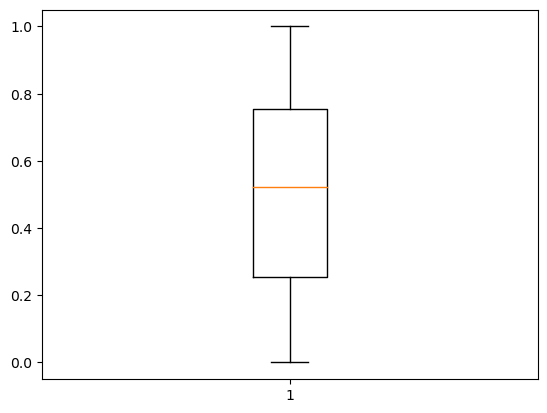

In [32]:
plt.boxplot(tdf['user_id_extra'])

(array([120788.,  93113., 109387.,  87031., 111253., 119514., 114700.,
        118091., 111237., 106945.]),
 array([1.00000e+00, 4.08720e+03, 8.17340e+03, 1.22596e+04, 1.63458e+04,
        2.04320e+04, 2.45182e+04, 2.86044e+04, 3.26906e+04, 3.67768e+04,
        4.08630e+04]),
 <BarContainer object of 10 artists>)

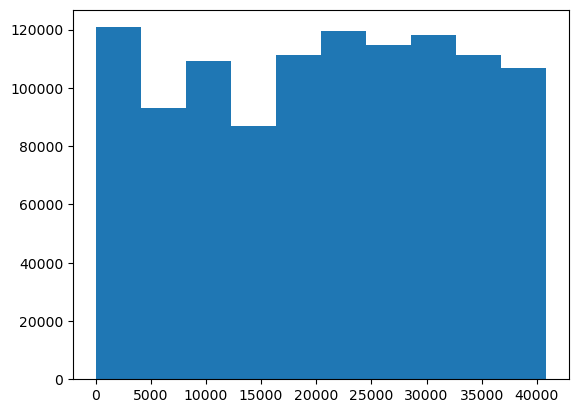

In [34]:
plt.hist(tdf['user_id'])

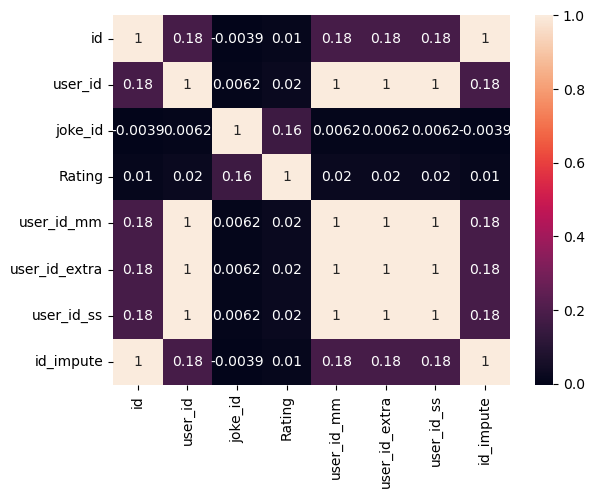

In [38]:
corr_data=tdf.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

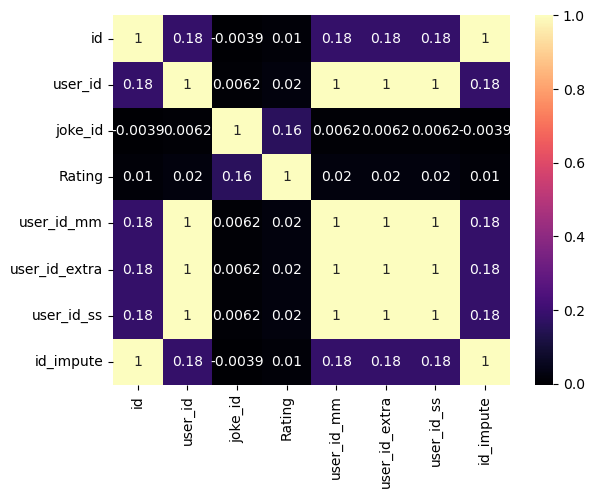

In [39]:
corr_data=tdf.corr()
sns.heatmap(corr_data,annot=True,cmap='magma')
plt.show()

In [40]:
tdf=pd.read_csv(r'C:\Users\My world\Downloads\train_MaefO4x\train.csv')

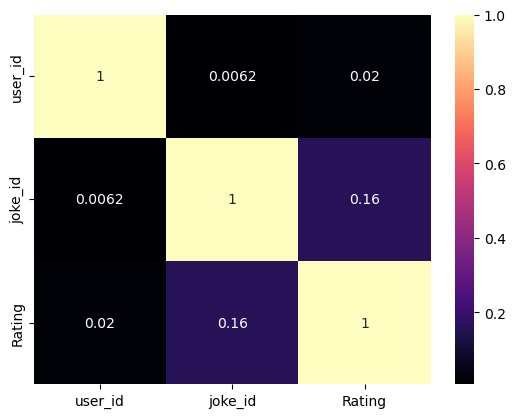

In [41]:
corr_data=tdf.corr()
sns.heatmap(corr_data,annot=True,cmap='magma')
plt.show()

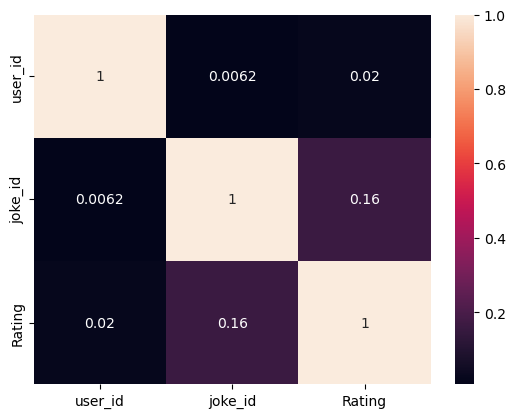

In [42]:
corr_data=tdf.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

In [46]:
tdf['id'].unique()

array(['31030_110', '16144_109', '23098_6', ..., '10580_81', '31007_119',
       '8420_98'], dtype=object)

In [47]:
tdf['user_id'].unique()

array([31030, 16144, 23098, ...,  6626, 10954, 18942], dtype=int64)

In [48]:
tdf['Rating'].unique()

array([  2.75 ,   5.094,  -6.438,   4.406,   9.375,  -1.781,   6.25 ,
        -2.906,  -5.75 ,   1.656,   0.688,   1.312,   6.031,   9.781,
         8.75 ,   0.156,   3.562,   2.938,   3.75 ,  -1.906,   3.469,
         7.   ,   4.656,   1.719,   6.219,  -8.25 ,   5.188,  -2.281,
         1.406,   2.906,   3.625,   6.719,   5.656,   8.562,   2.156,
        -5.344,   3.25 ,   1.   ,   7.375,   8.031,   6.125,   7.469,
         2.125,   4.062,  -8.   ,  -2.75 ,   9.406,   8.875,   4.5  ,
        -3.188,  -6.875,   2.719,   0.562,   2.969,   8.375,  -4.906,
         8.594,  -7.469,   0.25 ,   6.406,   5.125,   3.156,   0.312,
         0.969,  -3.969,   5.438,  -0.031,  -1.969,   4.688,   2.781,
         0.875,  -9.625,  -2.188,  -3.062,   8.781,   6.938,  -7.406,
         9.281,  -0.5  ,   1.25 ,   5.031,   3.375,   4.375,   6.875,
         6.688,   8.531,   5.594,   7.75 ,   8.281,  -0.531,   9.5  ,
         6.812,  -4.125,   1.875,   3.688,   4.438,  -5.5  ,  -1.406,
         4.031,  -0.